# 9 Qubit Shor Code
Das folgende Jupyter Notebook demonstriert den Aufbau des 9 Qubit Shor Code.  
https://quantumcomputinguk.org/tutorials/quantum-error-correction-shor-code-in-qiskit

### Notwendige Imports

In [73]:
from qiskit import QuantumRegister, ClassicalRegister, QuantumCircuit
from qiskit.providers.basic_provider import BasicProvider
from qiskit.visualization import plot_histogram

## Schaltkreis mit Bitflip und Phaseflip Fehlern ohne Fehlerkorrektur

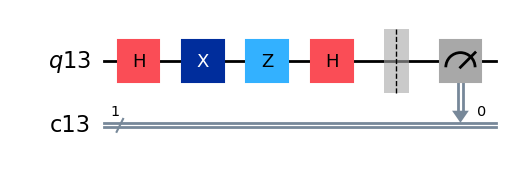

In [74]:
qreg = QuantumRegister(1)
creg = ClassicalRegister(1)
circuit = QuantumCircuit(qreg, creg)
circuit.h(qreg[0])

circuit.x(qreg[0])#Bit flip error
circuit.z(qreg[0])#Phase flip error

circuit.h(qreg[0])

circuit.barrier(qreg)

circuit.measure(qreg[0],creg[0])
circuit.draw(output='mpl')

Ausführung auf QASM-Simulator mit 1024 Shots

{'1': 1024}


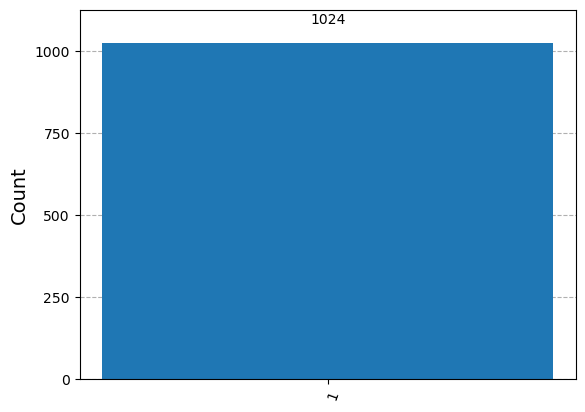

In [75]:
backend = BasicProvider().get_backend("basic_simulator")

result_sim = backend.run(circuit, shots=1024).result()
counts = result_sim.get_counts(circuit)
print(counts)
plot_histogram(counts)

## Schaltkreis mit Fehlerkorrektur

In [76]:
qreg = QuantumRegister(9)
creg = ClassicalRegister(1)
circuit = QuantumCircuit(qreg, creg)

Enkodierung Phaseflip

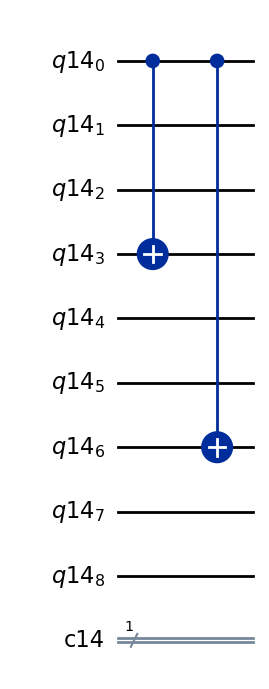

In [77]:
circuit.cx(qreg[0],qreg[3])
circuit.cx(qreg[0],qreg[6])

circuit.draw(output='mpl')

Setzen der Qubits in Superposition

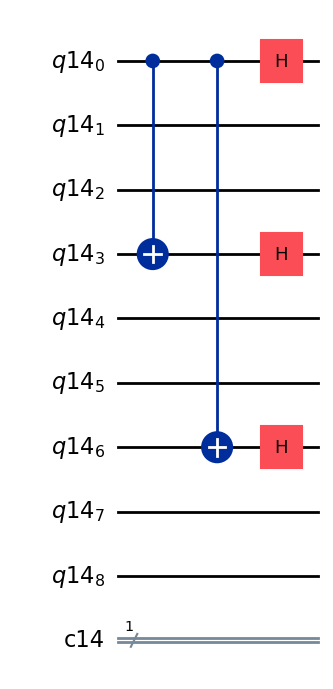

In [78]:
circuit.h(qreg[0])
circuit.h(qreg[3])
circuit.h(qreg[6])

circuit.draw(output='mpl')

Für jedes Bit des Codeworts Bitflip Code anwenden

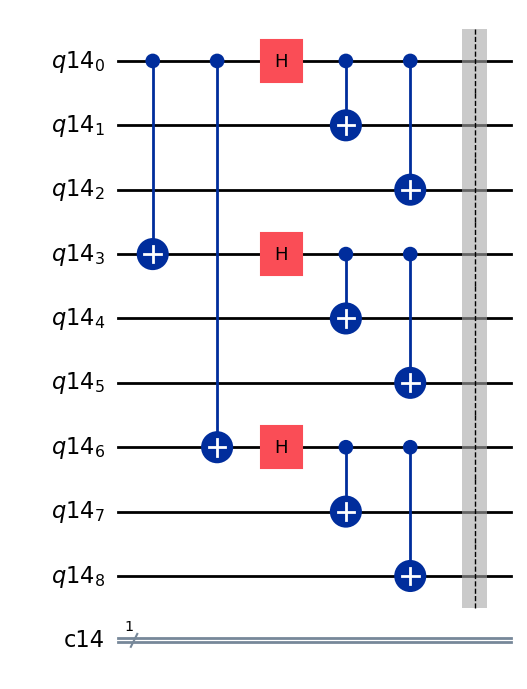

In [79]:
circuit.cx(qreg[0],qreg[1])
circuit.cx(qreg[3],qreg[4])
circuit.cx(qreg[6],qreg[7])

circuit.cx(qreg[0],qreg[2])
circuit.cx(qreg[3],qreg[5])
circuit.cx(qreg[6],qreg[8])

circuit.barrier(qreg)

circuit.draw(output='mpl')

Fehler tritt auf

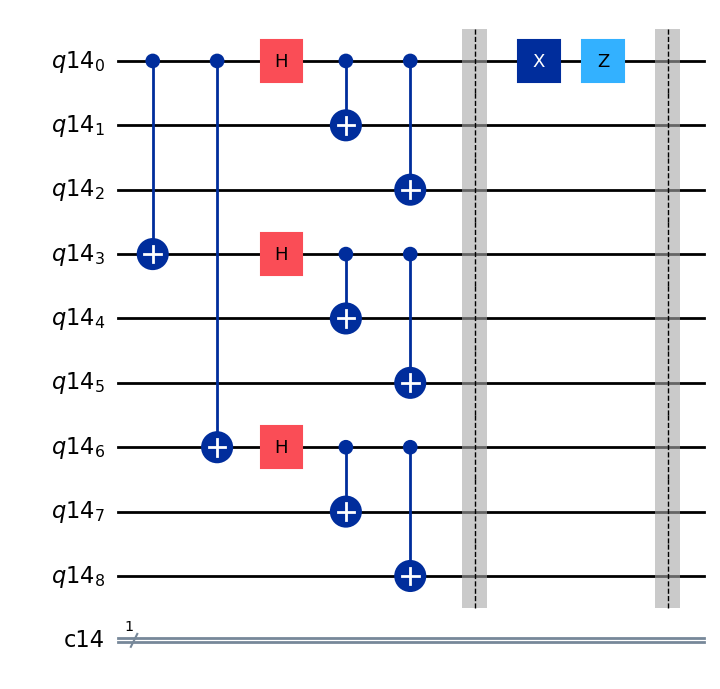

In [80]:
# Hier wird der Fehler eingefügt
circuit.x(qreg[0])#Bit flip error
circuit.z(qreg[0])#Phase flip error

circuit.barrier(qreg)

circuit.draw(output='mpl')

Dekodierung Bitflip

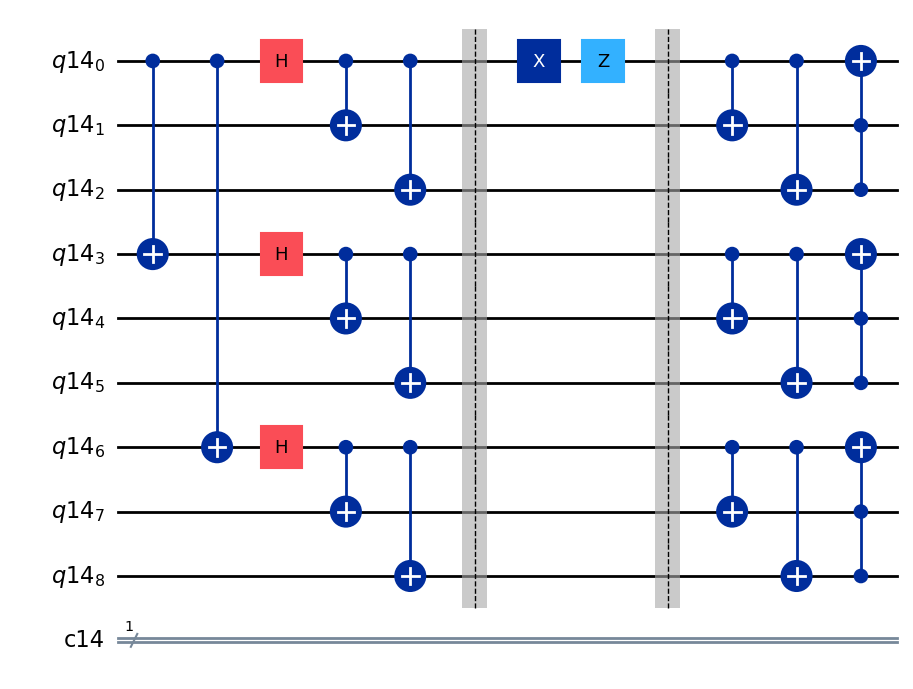

In [81]:
circuit.cx(qreg[0],qreg[1])
circuit.cx(qreg[3],qreg[4])
circuit.cx(qreg[6],qreg[7])

circuit.cx(qreg[0],qreg[2])
circuit.cx(qreg[3],qreg[5])
circuit.cx(qreg[6],qreg[8])

circuit.ccx(qreg[1],qreg[2],qreg[0])
circuit.ccx(qreg[4],qreg[5],qreg[3])
circuit.ccx(qreg[8],qreg[7],qreg[6])

circuit.draw(output='mpl')

Dekodierung Phaseflip

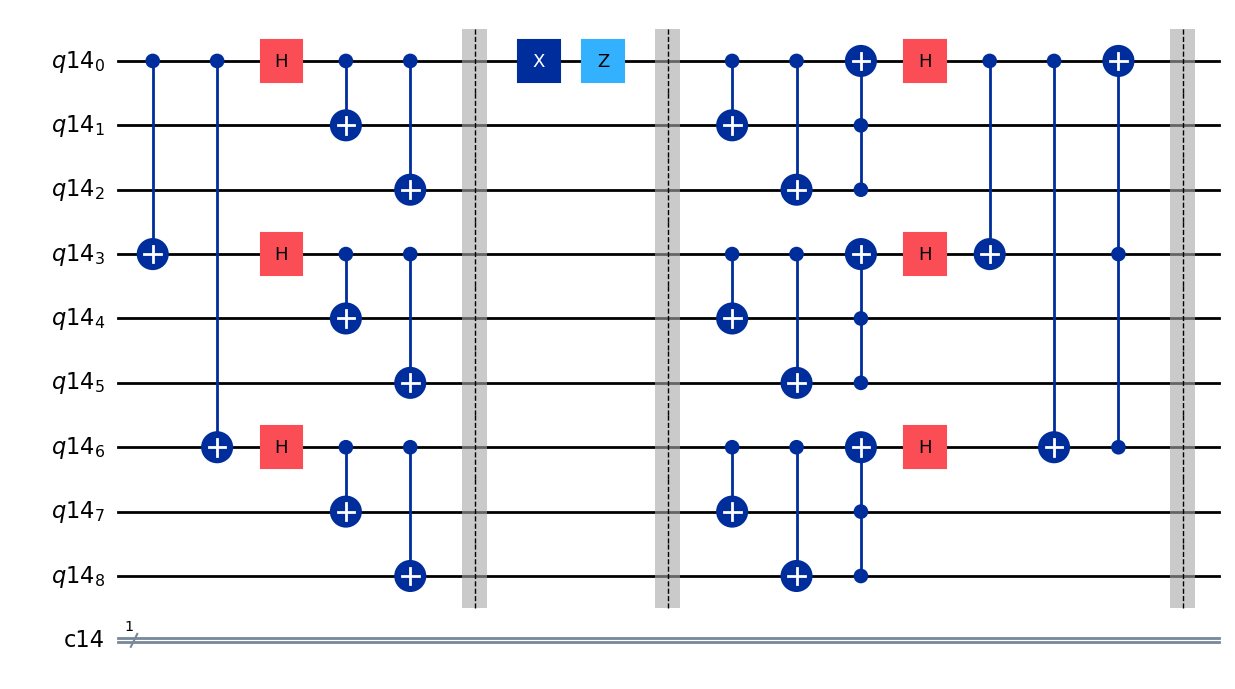

In [82]:
circuit.h(qreg[0])
circuit.h(qreg[3])
circuit.h(qreg[6])

circuit.cx(qreg[0],qreg[3])
circuit.cx(qreg[0],qreg[6])

circuit.ccx(qreg[6],qreg[3],qreg[0])

circuit.barrier(qreg)

circuit.draw(output='mpl')

Messung des Ergebnisses

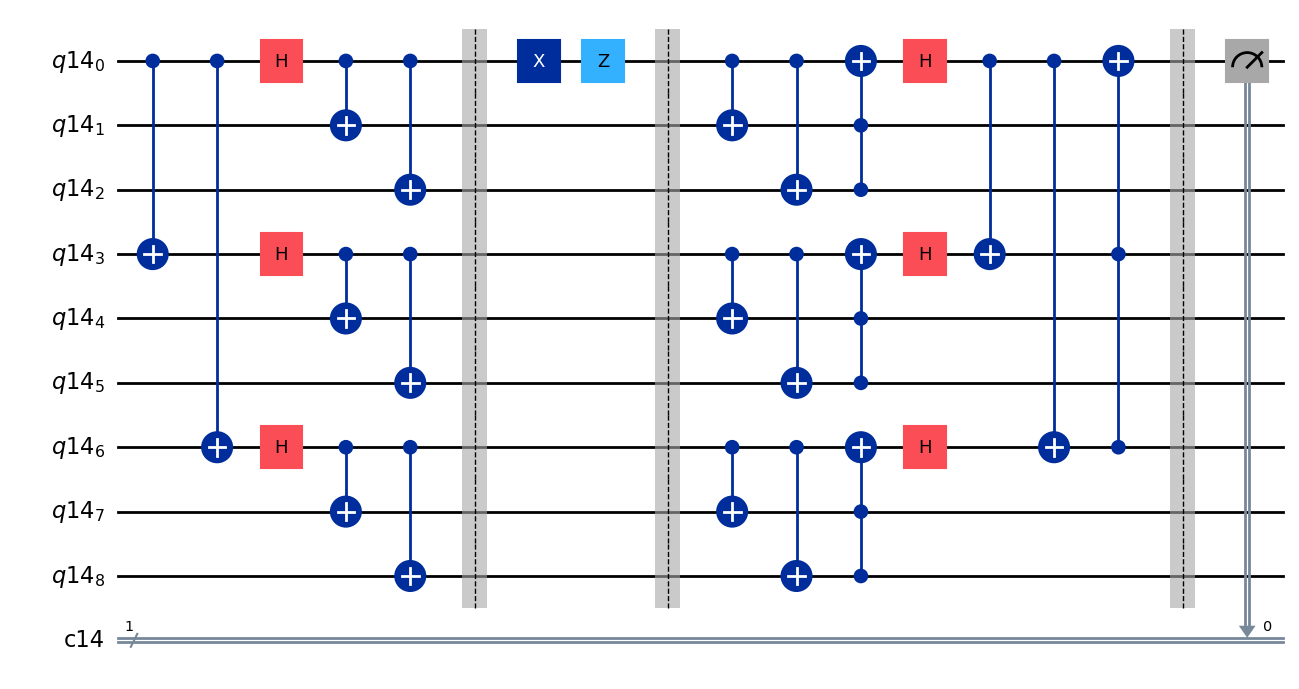

In [83]:
circuit.measure(qreg[0],creg[0])

circuit.draw(output='mpl')

Ausführung auf QASM-Simulator mit 1024 Shots

{'0': 1024}


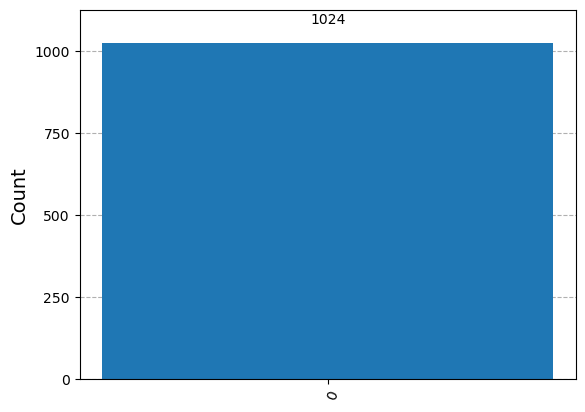

In [84]:
backend = BasicProvider().get_backend("basic_simulator")

result_sim = backend.run(circuit, shots=1024).result()
counts = result_sim.get_counts(circuit)
print(counts)
plot_histogram(counts)